<a href="https://colab.research.google.com/github/FYP-CodeByte/ckd-prediction-project/blob/master/models/CKD_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve

In [ ]:
# Mount drive to access prepared data
drive.mount('/content/drive')
base_path = '/content/drive/My Drive/CKD_Project/data/final/'

# Load prepared datasets
X_train = np.load(base_path + 'X_train.npy')
X_test = np.load(base_path + 'X_test.npy')
y_stage_train = np.load(base_path + 'y_stage_train.npy')
y_stage_test = np.load(base_path + 'y_stage_test.npy')
y_diag_train = np.load(base_path + 'y_diag_train.npy')
y_diag_test = np.load(base_path + 'y_diag_test.npy')

# Load column names for feature importance analysis
model_data = pd.read_csv(base_path + 'ckd_model_data.csv')
feature_names = [col for col in model_data.columns if col not in ['Diagnosis', 'CKDStage']]

Mounted at /content/drive


Training set: (1327, 23)
Testing set: (332, 23)

CKD Stage Distribution (Training):
Stage 1: 105 samples (7.91%)
Stage 2: 113 samples (8.52%)
Stage 3: 290 samples (21.85%)
Stage 4: 505 samples (38.06%)
Stage 5: 314 samples (23.66%)


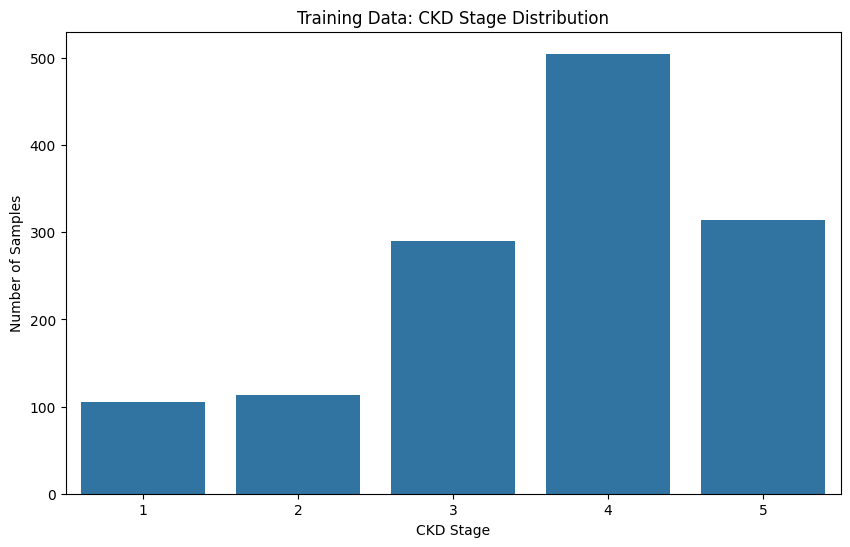

In [ ]:
# Print basic information
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

# Check target distribution
print("\nCKD Stage Distribution (Training):")
for stage in sorted(np.unique(y_stage_train)):
    count = np.sum(y_stage_train == stage)
    print(f"Stage {stage}: {count} samples ({count/len(y_stage_train)*100:.2f}%)")

# Visualize stage distribution
plt.figure(figsize=(10, 6))
stage_counts = pd.Series(y_stage_train).value_counts().sort_index()
sns.barplot(x=stage_counts.index, y=stage_counts.values)
plt.title("Training Data: CKD Stage Distribution")
plt.xlabel("CKD Stage")
plt.ylabel("Number of Samples")
plt.show()

In [ ]:
# Set up evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, is_binary=False):
    """
    Train and evaluate a model with comprehensive metrics
    """
    # Train the model
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)

    # For multi-class
    if not is_binary:
        # Average metrics across all classes
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Class-specific metrics
        print(f"\n{model_name} - Classification Report:")
        print(classification_report(y_test, y_pred))

        # Confusion matrix
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=[f'Stage {i}' for i in range(1, 6)],
                    yticklabels=[f'Stage {i}' for i in range(1, 6)])
        plt.title(f'{model_name} - Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        plt.show()

    # For binary classification
    else:
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # ROC curve
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            auc = roc_auc_score(y_test, y_prob)

            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
            plt.plot([0, 1], [0, 1], 'k--')
            plt.title(f'{model_name} - ROC Curve')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend()
            plt.show()

    # Print summary metrics
    print(f"\n{model_name} - Performance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return {
        'model': model,
        'name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

--- CKD Stage Prediction: Logistic Regression ---

Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.92      0.94        26
           2       0.88      0.79      0.83        28
           3       0.88      0.83      0.86        72
           4       0.84      0.90      0.87       127
           5       0.87      0.86      0.87        79

    accuracy                           0.87       332
   macro avg       0.89      0.86      0.87       332
weighted avg       0.87      0.87      0.87       332



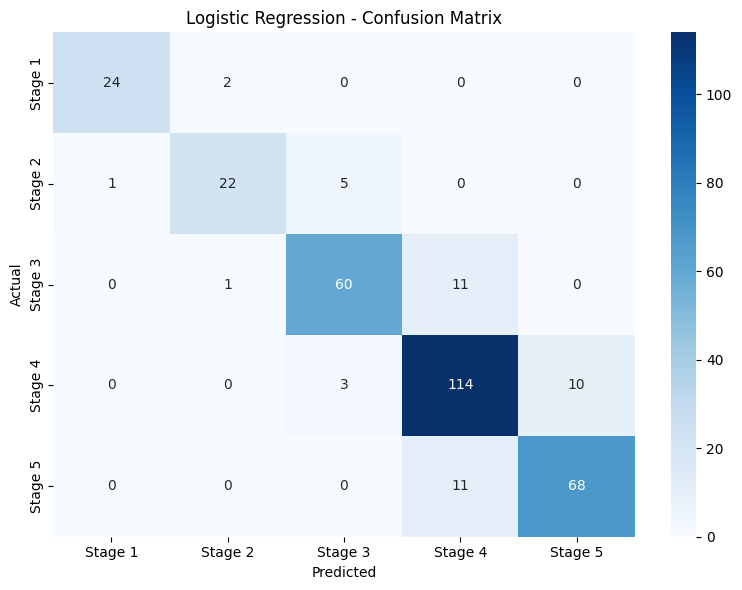


Logistic Regression - Performance Metrics:
Accuracy: 0.8675
Precision: 0.8688
Recall: 0.8675
F1 Score: 0.8674


In [ ]:
# Models for CKD stage prediction (multi-class)
print("--- CKD Stage Prediction: Logistic Regression ---")

# 1. Logistic Regression (with multinomial option for multi-class)
lr_model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
lr_results = evaluate_model(lr_model, X_train, X_test, y_stage_train, y_stage_test,
                            "Logistic Regression")

--- CKD Stage Prediction: Support Vector Machine ---

Training Support Vector Machine...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


Support Vector Machine - Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        26
           2       0.00      0.00      0.00        28
           3       0.00      0.00      0.00        72
           4       0.38      1.00      0.55       127
           5       0.00      0.00      0.00        79

    accuracy                           0.38       332
   macro avg       0.08      0.20      0.11       332
weighted avg       0.15      0.38      0.21       332



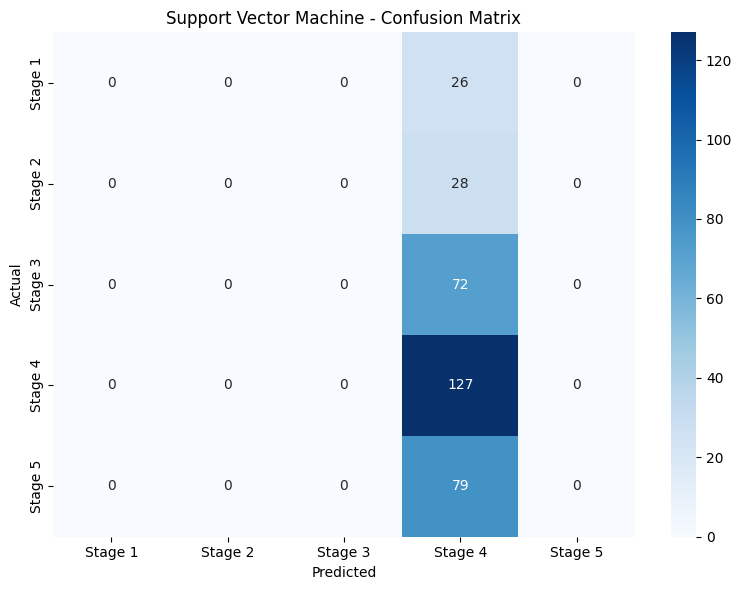


Support Vector Machine - Performance Metrics:
Accuracy: 0.3825
Precision: 0.1463
Recall: 0.3825
F1 Score: 0.2117


In [ ]:
# 2. Support Vector Machine
print("--- CKD Stage Prediction: Support Vector Machine ---")

svm_model = SVC(
    probability=True,
    kernel='rbf',  # Try 'linear', 'poly', 'rbf'
    C=1.0,
    random_state=42
)
svm_results = evaluate_model(svm_model, X_train, X_test, y_stage_train, y_stage_test,
                             "Support Vector Machine")

--- CKD Stage Prediction: Random Forest ---

Training Random Forest...

Random Forest - Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      0.96      0.98        28
           3       0.99      0.97      0.98        72
           4       0.98      1.00      0.99       127
           5       1.00      1.00      1.00        79

    accuracy                           0.99       332
   macro avg       0.99      0.99      0.99       332
weighted avg       0.99      0.99      0.99       332



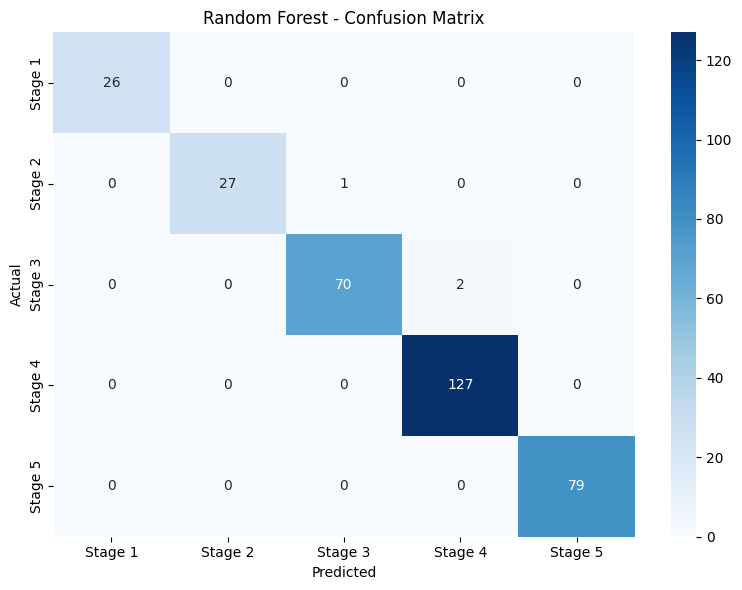


Random Forest - Performance Metrics:
Accuracy: 0.9910
Precision: 0.9910
Recall: 0.9910
F1 Score: 0.9909


In [ ]:
# 3. Random Forest
print("--- CKD Stage Prediction: Random Forest ---")

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)
rf_results = evaluate_model(rf_model, X_train, X_test, y_stage_train, y_stage_test,
                            "Random Forest")

In [ ]:
# Create a GFR-independent model
print("--- Creating GFR-independent dataset ---")

# Find GFR index in features
gfr_index = None
for i, feature in enumerate(feature_names):
    if feature == 'GFR':
        gfr_index = i
        break

# Create versions of your data without GFR
if gfr_index is not None:
    X_train_no_gfr = np.delete(X_train, gfr_index, axis=1)
    X_test_no_gfr = np.delete(X_test, gfr_index, axis=1)
    feature_names_no_gfr = feature_names.copy()
    feature_names_no_gfr.pop(gfr_index)
    print(f"Removed GFR (index {gfr_index}) from features")
else:
    X_train_no_gfr = X_train.copy()
    X_test_no_gfr = X_test.copy()
    feature_names_no_gfr = feature_names.copy()
    print("GFR not found in feature names")

print(f"Training data shape without GFR: {X_train_no_gfr.shape}")
print(f"Number of features without GFR: {len(feature_names_no_gfr)}")

--- Creating GFR-independent dataset ---
Removed GFR (index 13) from features
Training data shape without GFR: (1327, 22)
Number of features without GFR: 22


--- CKD Stage Prediction: XGBoost (No GFR) ---

XGBoost (No GFR) - Classification Report:
              precision    recall  f1-score   support

           1       0.93      1.00      0.96        26
           2       0.84      0.75      0.79        28
           3       0.89      0.86      0.87        72
           4       0.92      0.94      0.93       127
           5       0.95      0.95      0.95        79

    accuracy                           0.92       332
   macro avg       0.91      0.90      0.90       332
weighted avg       0.91      0.92      0.91       332



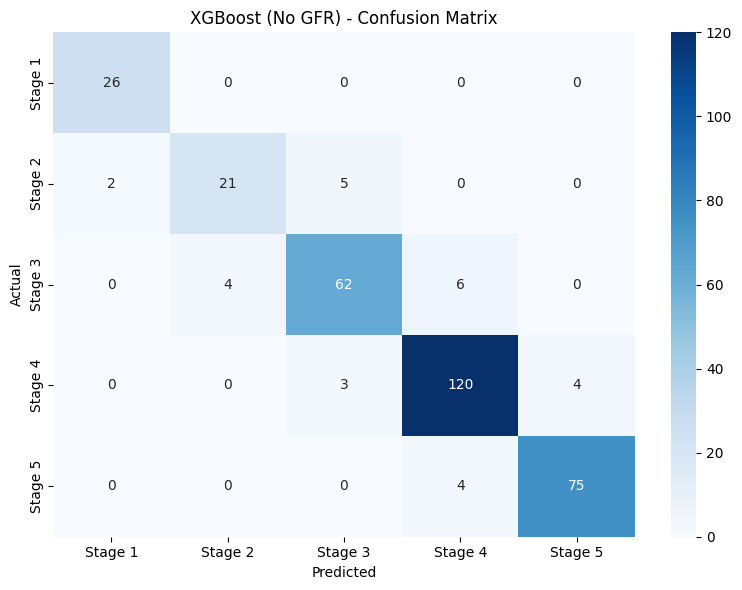


XGBoost (No GFR) - Performance Metrics:
Accuracy: 0.9157
Precision: 0.9147
Recall: 0.9157
F1 Score: 0.9148


In [ ]:
# 4. XGBoost without GFR
print("--- CKD Stage Prediction: XGBoost (No GFR) ---")

# XGBoost requires class labels to start from 0
y_stage_train_xgb = y_stage_train - 1  # Convert stages 1-5 to 0-4
y_stage_test_xgb = y_stage_test - 1    # Convert stages 1-5 to 0-4

# Train model without GFR
xgb_model_no_gfr = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

# Train the model
xgb_model_no_gfr.fit(X_train_no_gfr, y_stage_train_xgb)

# Make predictions
y_pred_xgb = xgb_model_no_gfr.predict(X_test_no_gfr)
y_pred = y_pred_xgb + 1  # Convert back to stages 1-5

# Calculate metrics
accuracy = accuracy_score(y_stage_test, y_pred)
precision = precision_score(y_stage_test, y_pred, average='weighted')
recall = recall_score(y_stage_test, y_pred, average='weighted')
f1 = f1_score(y_stage_test, y_pred, average='weighted')

# Class-specific metrics
print("\nXGBoost (No GFR) - Classification Report:")
print(classification_report(y_stage_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_stage_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Stage {i}' for i in range(1, 6)],
            yticklabels=[f'Stage {i}' for i in range(1, 6)])
plt.title('XGBoost (No GFR) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Print summary metrics
print("\nXGBoost (No GFR) - Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

xgb_no_gfr_results = {
    'model': xgb_model_no_gfr,
    'name': "XGBoost (No GFR)",
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1
}

--- CKD Stage Prediction: XGBoost (With GFR) ---

XGBoost (With GFR) - Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      0.96      0.98        28
           3       0.99      0.97      0.98        72
           4       0.98      1.00      0.99       127
           5       1.00      1.00      1.00        79

    accuracy                           0.99       332
   macro avg       0.99      0.99      0.99       332
weighted avg       0.99      0.99      0.99       332



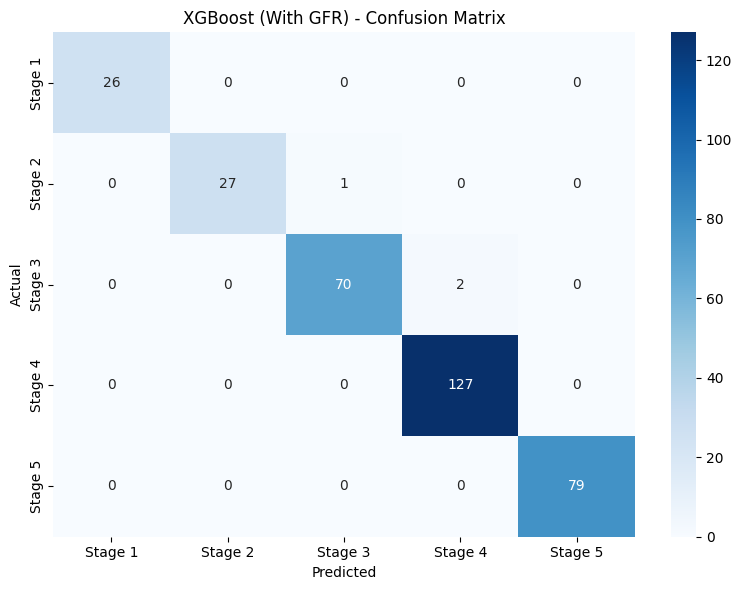


XGBoost (With GFR) - Performance Metrics:
Accuracy: 0.9910
Precision: 0.9910
Recall: 0.9910
F1 Score: 0.9909


In [ ]:
# 4. XGBoost with GFR (original model)
print("--- CKD Stage Prediction: XGBoost (With GFR) ---")

# XGBoost requires class labels to start from 0
y_stage_train_xgb = y_stage_train - 1  # Convert stages 1-5 to 0-4
y_stage_test_xgb = y_stage_test - 1    # Convert stages 1-5 to 0-4

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

# Train with adjusted labels
xgb_model.fit(X_train, y_stage_train_xgb)

# Predict with adjusted labels
y_pred_xgb = xgb_model.predict(X_test)

# Convert predictions back to original scale for evaluation
y_pred = y_pred_xgb + 1  # Convert back to stages 1-5

# Calculate metrics manually since we're not using the evaluation function
accuracy = accuracy_score(y_stage_test, y_pred)
precision = precision_score(y_stage_test, y_pred, average='weighted')
recall = recall_score(y_stage_test, y_pred, average='weighted')
f1 = f1_score(y_stage_test, y_pred, average='weighted')

# Print results
print("\nXGBoost (With GFR) - Classification Report:")
print(classification_report(y_stage_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_stage_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Stage {i}' for i in range(1, 6)],
            yticklabels=[f'Stage {i}' for i in range(1, 6)])
plt.title('XGBoost (With GFR) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Print summary metrics
print("\nXGBoost (With GFR) - Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Store results in the same format as other models
xgb_results = {
    'model': xgb_model,
    'name': "XGBoost (With GFR)",
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1
}

Model Comparison Results:
                     name  accuracy  precision    recall        f1
0     Logistic Regression  0.867470   0.868847  0.867470  0.867356
1  Support Vector Machine  0.382530   0.146329  0.382530  0.211683
2           Random Forest  0.990964   0.991015  0.990964  0.990928
3      XGBoost (With GFR)  0.990964   0.991015  0.990964  0.990928
4        XGBoost (No GFR)  0.915663   0.914654  0.915663  0.914754


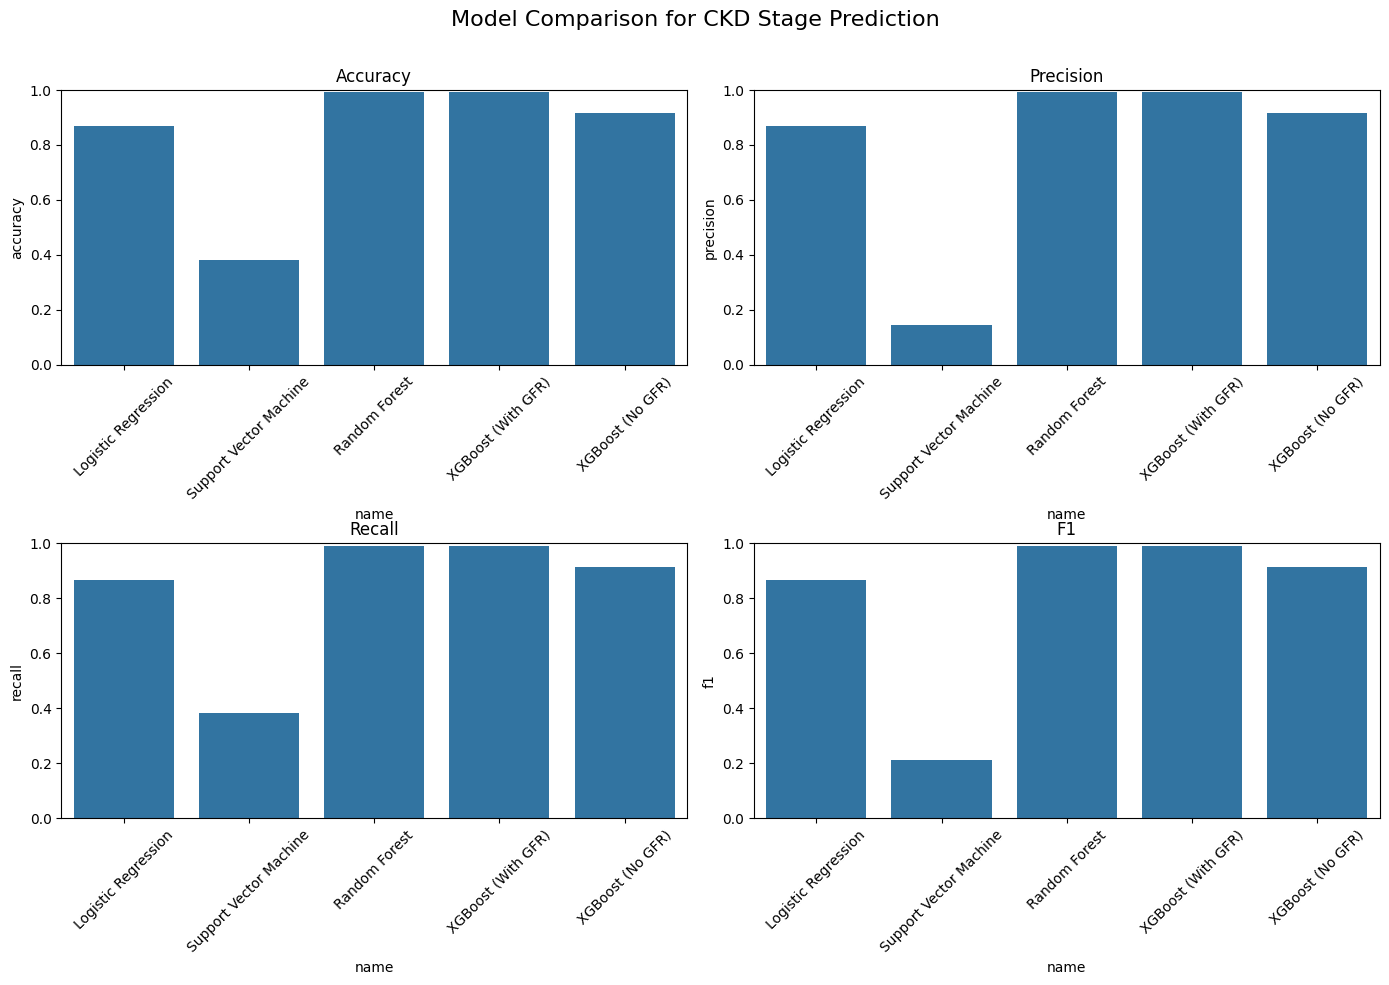

In [ ]:
# Compare all models
all_results = [lr_results, svm_results, rf_results, xgb_results, xgb_no_gfr_results]
results_df = pd.DataFrame(all_results)

# Display results table
print("Model Comparison Results:")
print(results_df[['name', 'accuracy', 'precision', 'recall', 'f1']])

# Visualize comparison
plt.figure(figsize=(14, 10))
metrics = ['accuracy', 'precision', 'recall', 'f1']
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='name', y=metric, data=results_df)
    plt.title(f'{metric.capitalize()}')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)

plt.tight_layout()
plt.suptitle('Model Comparison for CKD Stage Prediction', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

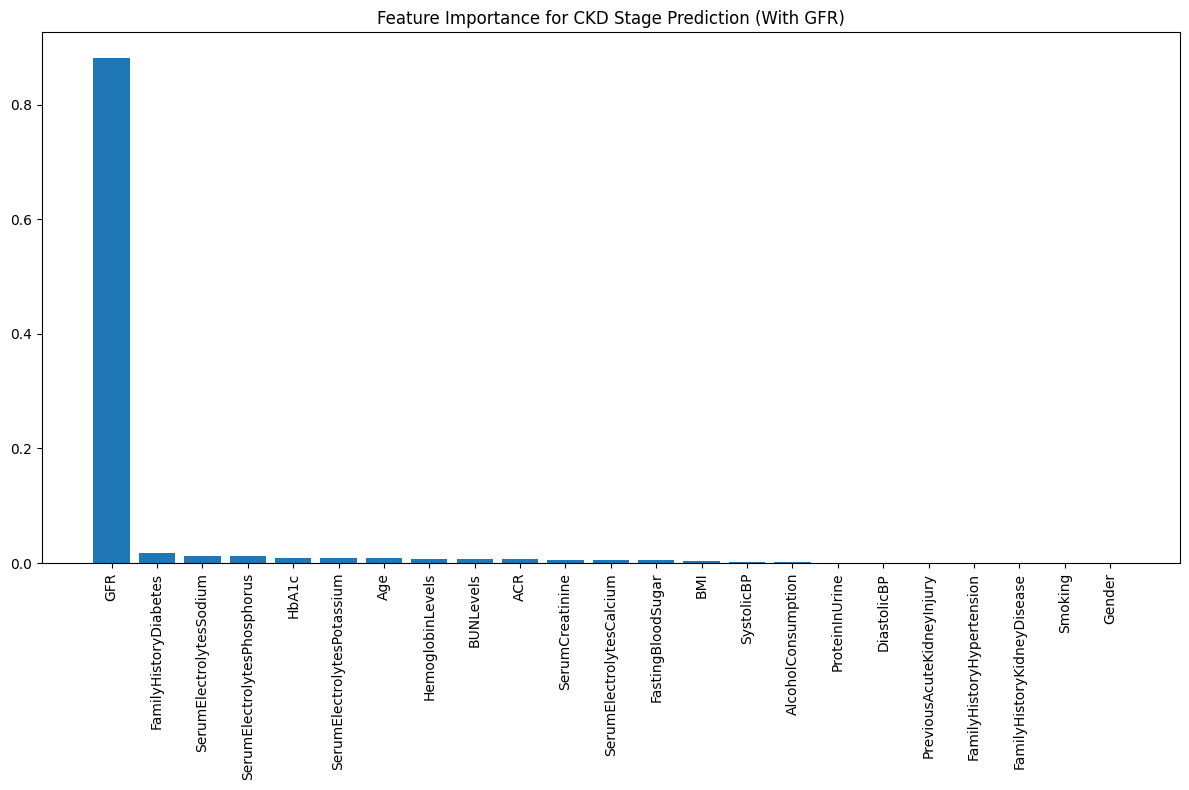


Top 10 Important Features (With GFR):
GFR: 0.8824
FamilyHistoryDiabetes: 0.0183
SerumElectrolytesSodium: 0.0127
SerumElectrolytesPhosphorus: 0.0120
HbA1c: 0.0096
SerumElectrolytesPotassium: 0.0093
Age: 0.0085
HemoglobinLevels: 0.0078
BUNLevels: 0.0069
ACR: 0.0067


In [ ]:
# Feature importance analysis for XGBoost with GFR
if hasattr(xgb_model, 'feature_importances_'):
    importances = xgb_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 8))
    plt.title('Feature Importance for CKD Stage Prediction (With GFR)')
    plt.bar(range(X_train.shape[1]), importances[indices], align='center')
    plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

    print("\nTop 10 Important Features (With GFR):")
    for i in range(min(10, len(indices))):
        print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

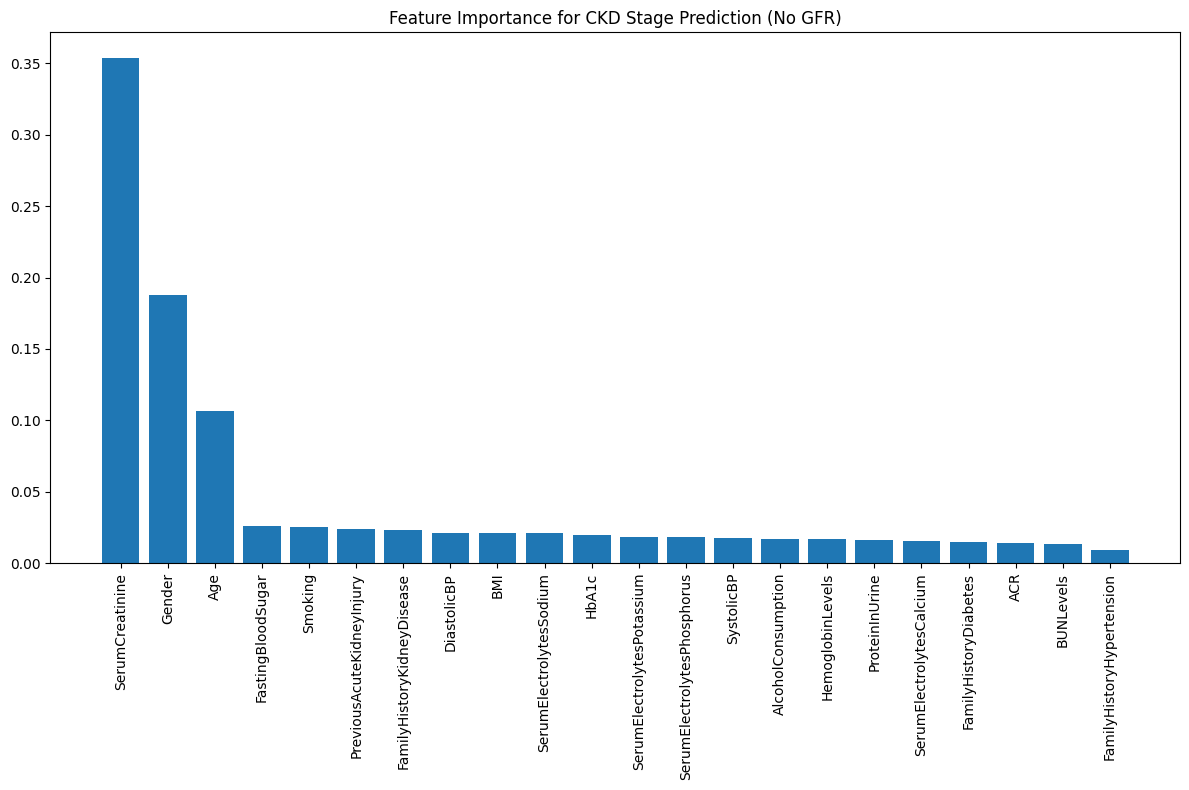


Top 10 Important Features (No GFR):
SerumCreatinine: 0.3540
Gender: 0.1881
Age: 0.1064
FastingBloodSugar: 0.0262
Smoking: 0.0251
PreviousAcuteKidneyInjury: 0.0240
FamilyHistoryKidneyDisease: 0.0230
DiastolicBP: 0.0210
BMI: 0.0209
SerumElectrolytesSodium: 0.0208


In [ ]:
# Feature importance analysis for XGBoost without GFR
if hasattr(xgb_model_no_gfr, 'feature_importances_'):
    importances = xgb_model_no_gfr.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 8))
    plt.title('Feature Importance for CKD Stage Prediction (No GFR)')
    plt.bar(range(len(feature_names_no_gfr)), importances[indices], align='center')
    plt.xticks(range(len(feature_names_no_gfr)), [feature_names_no_gfr[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

    print("\nTop 10 Important Features (No GFR):")
    for i in range(min(10, len(indices))):
        print(f"{feature_names_no_gfr[indices[i]]}: {importances[indices[i]]:.4f}")

In [ ]:
# Save both models for later use
import pickle

# Save XGBoost with GFR
with open(base_path + 'xgb_with_gfr_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

# Save XGBoost without GFR
with open(base_path + 'xgb_no_gfr_model.pkl', 'wb') as f:
    pickle.dump(xgb_model_no_gfr, f)

print("Models saved successfully!")

--- Hyperparameter Tuning for XGBoost Models ---

Tuning XGBoost model with GFR...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits

Best parameters for XGBoost with GFR:
{'gamma': 0, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 150}

XGBoost (With GFR) Tuned - Performance Metrics:
Accuracy: 0.9849
Precision: 0.9851
Recall: 0.9849
F1 Score: 0.9849

Tuning XGBoost model without GFR...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits

Best parameters for XGBoost without GFR:
{'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50}

XGBoost (No GFR) Tuned - Performance Metrics:
Accuracy: 0.9096
Precision: 0.9088
Recall: 0.9096
F1 Score: 0.9088


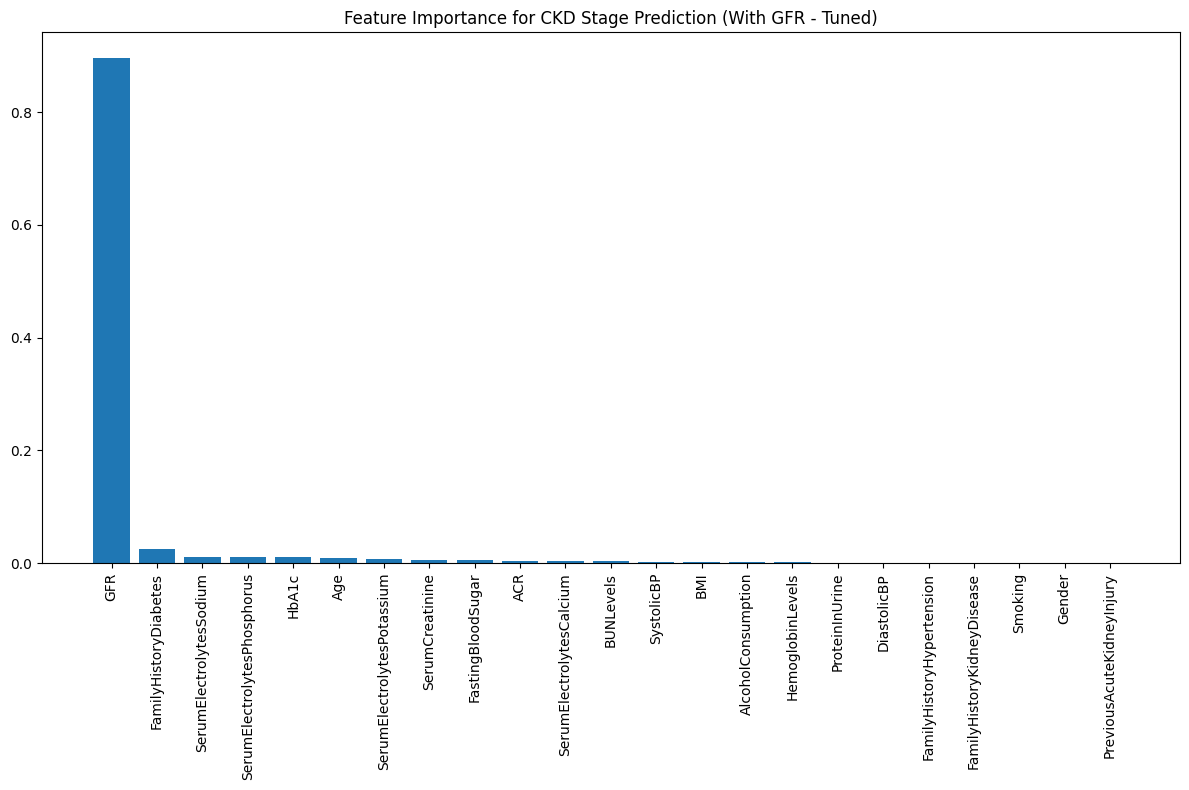


Top 10 Important Features (With GFR - Tuned):
GFR: 0.8971
FamilyHistoryDiabetes: 0.0255
SerumElectrolytesSodium: 0.0112
SerumElectrolytesPhosphorus: 0.0107
HbA1c: 0.0099
Age: 0.0082
SerumElectrolytesPotassium: 0.0080
SerumCreatinine: 0.0052
FastingBloodSugar: 0.0050
ACR: 0.0044


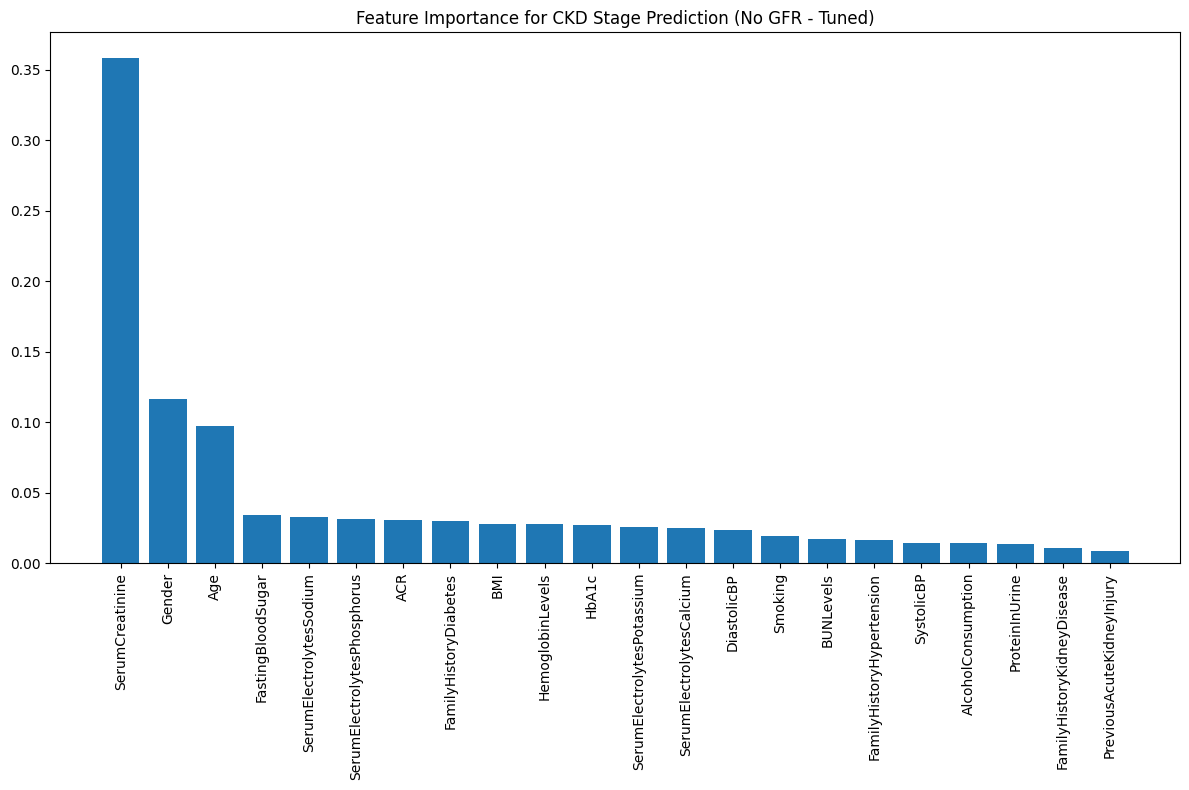


Top 10 Important Features (No GFR - Tuned):
SerumCreatinine: 0.3585
Gender: 0.1165
Age: 0.0972
FastingBloodSugar: 0.0343
SerumElectrolytesSodium: 0.0326
SerumElectrolytesPhosphorus: 0.0311
ACR: 0.0308
FamilyHistoryDiabetes: 0.0298
BMI: 0.0278
HemoglobinLevels: 0.0277


In [ ]:
# Hyperparameter tuning for XGBoost models
from sklearn.model_selection import GridSearchCV

print("--- Hyperparameter Tuning for XGBoost Models ---")

# Define parameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

# Create grid search for "with GFR" model
print("\nTuning XGBoost model with GFR...")
grid_search_with_gfr = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    verbose=1,
    n_jobs=-1
)

# Convert target to 0-indexed for XGBoost
y_stage_train_xgb = y_stage_train - 1

# Fit grid search
grid_search_with_gfr.fit(X_train, y_stage_train_xgb)

# Print best parameters
print("\nBest parameters for XGBoost with GFR:")
print(grid_search_with_gfr.best_params_)

# Evaluate optimized model
xgb_with_gfr_tuned = grid_search_with_gfr.best_estimator_
y_pred_xgb = xgb_with_gfr_tuned.predict(X_test)
y_pred = y_pred_xgb + 1  # Convert back to stages 1-5

# Calculate metrics
accuracy = accuracy_score(y_stage_test, y_pred)
precision = precision_score(y_stage_test, y_pred, average='weighted')
recall = recall_score(y_stage_test, y_pred, average='weighted')
f1 = f1_score(y_stage_test, y_pred, average='weighted')

print("\nXGBoost (With GFR) Tuned - Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Now tune the "without GFR" model
print("\nTuning XGBoost model without GFR...")
grid_search_no_gfr = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    verbose=1,
    n_jobs=-1
)

# Fit grid search on data without GFR
grid_search_no_gfr.fit(X_train_no_gfr, y_stage_train_xgb)

# Print best parameters
print("\nBest parameters for XGBoost without GFR:")
print(grid_search_no_gfr.best_params_)

# Evaluate optimized model
xgb_no_gfr_tuned = grid_search_no_gfr.best_estimator_
y_pred_xgb = xgb_no_gfr_tuned.predict(X_test_no_gfr)
y_pred = y_pred_xgb + 1  # Convert back to stages 1-5

# Calculate metrics
accuracy = accuracy_score(y_stage_test, y_pred)
precision = precision_score(y_stage_test, y_pred, average='weighted')
recall = recall_score(y_stage_test, y_pred, average='weighted')
f1 = f1_score(y_stage_test, y_pred, average='weighted')

print("\nXGBoost (No GFR) Tuned - Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Update feature importance for tuned models
# Feature importance for XGBoost with GFR (tuned)
if hasattr(xgb_with_gfr_tuned, 'feature_importances_'):
    importances = xgb_with_gfr_tuned.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 8))
    plt.title('Feature Importance for CKD Stage Prediction (With GFR - Tuned)')
    plt.bar(range(X_train.shape[1]), importances[indices], align='center')
    plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

    print("\nTop 10 Important Features (With GFR - Tuned):")
    for i in range(min(10, len(indices))):
        print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

# Feature importance for XGBoost without GFR (tuned)
if hasattr(xgb_no_gfr_tuned, 'feature_importances_'):
    importances = xgb_no_gfr_tuned.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 8))
    plt.title('Feature Importance for CKD Stage Prediction (No GFR - Tuned)')
    plt.bar(range(len(feature_names_no_gfr)), importances[indices], align='center')
    plt.xticks(range(len(feature_names_no_gfr)), [feature_names_no_gfr[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

    print("\nTop 10 Important Features (No GFR - Tuned):")
    for i in range(min(10, len(indices))):
        print(f"{feature_names_no_gfr[indices[i]]}: {importances[indices[i]]:.4f}")

In [ ]:
# Save the tuned models in a 'models' folder
import pickle
import os

# Create models directory if it doesn't exist
models_dir = 'models/'
os.makedirs(models_dir, exist_ok=True)

# Save XGBoost with GFR (tuned)
with open(models_dir + 'xgb_with_gfr_tuned_model.pkl', 'wb') as f:
    pickle.dump(xgb_with_gfr_tuned, f)

# Save XGBoost without GFR (tuned)
with open(models_dir + 'xgb_no_gfr_tuned_model.pkl', 'wb') as f:
    pickle.dump(xgb_no_gfr_tuned, f)

# Save feature names for reference
with open(models_dir + 'feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)

with open(models_dir + 'feature_names_no_gfr.pkl', 'wb') as f:
    pickle.dump(feature_names_no_gfr, f)

print(f"Tuned models and feature names saved successfully in '{models_dir}' folder!")